# chap01
# chap02_2_共享单车时租数量预测

> + **背景简介：** 共享单车系统是租赁自行车的一种方式。使用这些系统，人们可以从一个地方租用自行车，并根据需要将其归还到不同的地方。目前，全世界有超过500个自行车共享系统。在租赁的过程中自行车的行驶时长和路线等信息被完全记录下来，这些特征使得共享单车系统可以转变成一个巨大的表征城市便利性的虚拟感受网络。

> + **任务：**利用城市当天的天气、温度、湿度和风速等环境信息对自行车的租借数量进行有效预测，预测每小时内租用的自行车总数。

> + **数据集:** ` data_file = './dataSets/data_chap2/train.csv'`

> + **数据特征:**   

| 特征       	| 说明                                                                                                                                            	|
|------------:	|:-------------------------------------------------------------------------------------------------------------------------------------------------:	|
| datetime   	| 详细到小时的日期+时间戳                                                                                                                               	|
| season     	| 季节              1：春天，     2：夏天，     3：秋天，     4：冬天                                                                             	|
| holiday    	| 是否是公共假期                                                                                                                                  	|
| workingday 	| 是否是工作日（不是周末也不是公共假期）                                                                                                          	|
| weather    	| 天气情况 1：无云，少量云，部分多云     2：雾+多云，雾+云散开，雾+少云，雾     3：小雪，小雨+雷暴+散云，小雨+散云     4：暴雨+冰雹+雷暴+雾，雪+雾 	|
| temp       	| 以摄氏度为单位的温度                                                                                                                            	|
| atemp      	| 以摄氏度为单位的体感温度                                                                                                                        	|
| humidity   	| 相对湿度                                                                                                                                        	|
| windspeed  	| 风速                                                                                                                                            	|
| casual     	| 未注册用户租赁数量                                                                                                                              	|
| registered 	| 注册用户租赁数量                                                                                                                                	|
| count      	| 租赁自行车总数，包括未注册和注册                                                                                                                	|

In [58]:
# 忽略警告
import warnings
warnings.filterwarnings("ignore")


**导入工具包**

In [59]:
#基本工具包
import numpy as np
import pandas as pd
#画图
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 数据探索
    - 读取数据集
    - 打印数据集的前几行
    - 检测缺失值
    - 数据集的大小（维度）
    - 变量类型
    - 数据初步展示

✎ 载入数据并查看

In [60]:
# - 读取数据集 --> dataDaily
data_file = './dataSets/data_chap2/train.csv'
dataDaily =pd.read_csv(data_file)
# 查看数据集的前几行
#dataDaily.head()
dataDaily[:5]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


✎ 查看数据维度信息

In [61]:
# 查看数据维度信息
dataDaily.ndim

2

In [62]:
# 查看数据集的大小
dataDaily.shape

(10886, 12)

✎ 查看数据缺失值情况

In [63]:
# 检测缺失值情况
dataDaily.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [64]:
# - 变量类型等基本信息info()
dataDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


✎ 数值类数据描述信息（describe）：

In [65]:
# 数据初步展示,统计描述
dataDaily.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


✎ 数据整体可视化展示

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000193EEF39288>,
      dtype=object)

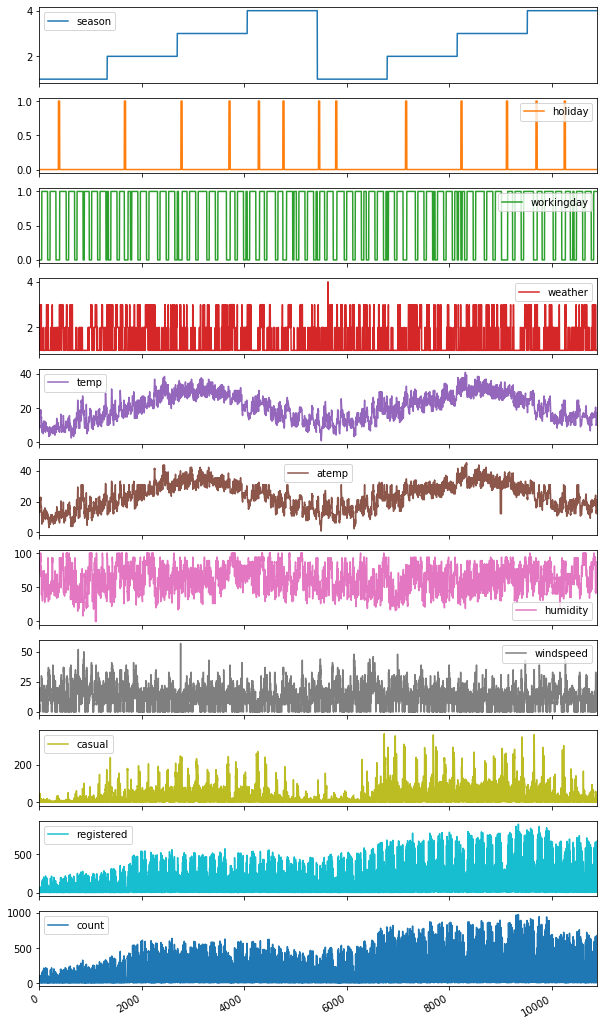

In [66]:
# 数据可视化展示:把所有特征全绘制出来，设置subplots=True
dataDaily.plot(subplots=True, figsize=(10,20))

## 2. 特征相关性分析

> * 理解因变量`y`如何受特征`X`（数值型）影响的一个常用方法是查看它们之间的相关矩阵。<br>
* `seaborn`中的热力图是一个有用的描述两个特征之间关系的方法<br>
* 绘制`count`和数值型特征`[`temp`,`atemp`,`humidity`,`windspeed`]`之间的相关热力图。
>> s1: 求出相关系数矩阵，pd.corr()   
s2: 使用`sn.heatmap()`绘图

In [67]:
# 获取dataDaily的特征名称(列名)
columns = dataDaily.columns
columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

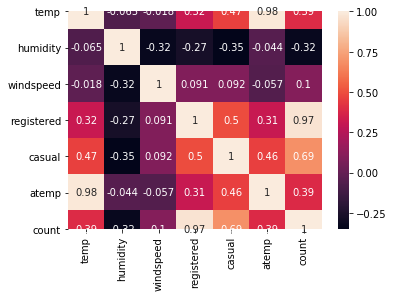

In [68]:
# 取以下特征'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'，构造相关系数矩阵
corrMat=dataDaily[['temp','humidity','windspeed','registered','casual','atemp','count']].corr()
# 绘制热力图
sn.heatmap(corrMat,annot=True,square=True)

In [1]:
sn.heatmap??

Object `sn.heatmap` not found.


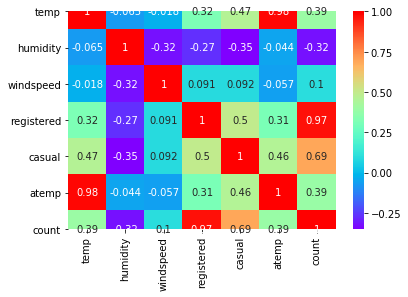

In [70]:
# 再绘制一次，添加参数cmap='rainbow'
sn.heatmap(corrMat,annot=True,cmap='rainbow')

由图可以看出：   
 - `temp`温度和`humidity`湿度特征分别与`count`呈正、负相关。但数值不大，即相关性不明显，说明`count`对`temp`温度和`humidity`湿度的依赖性较小。

 - `windspeed`不是真正有用的数字特征，这可以从它和`count`的相关值看出来。

 - `atemp`特征可删除，因为`atemp`和`temp`具有很强的相关性。在模型构建期间，必须删除二者其中一个变量，因为它们将在数据中表现出多重共线性。

 - `registered`注册用户租赁数量与`count`超级相关，从业务角度分析，`registered`注册用户租赁数量和`casual`未注册用户租赁数量之和等于`count`，它们本质上是`count`变量的leakage variables泄漏变量(二者相加等于`count`)，需要在模型构建时丢弃。
 
 
 **确定待删除的特征(原则；保证特征的独立性，不相关)**
 - 通过上述分析，删除以下特征`'casual','registered','atemp','datetime'`

In [71]:
# 构建要删除的特征名列表
dropFeatures = ['casual','registered','atemp','datetime']
# 删除后赋值给data
data = dataDaily.drop(dropFeatures,axis=1).copy()
# 查看删除后的data前5行
data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,1,0,0,1,9.84,81,0.0,16
1,1,0,0,1,9.02,80,0.0,40
2,1,0,0,1,9.02,80,0.0,32
3,1,0,0,1,9.84,75,0.0,13
4,1,0,0,1,9.84,75,0.0,1


## 3. 直接建模(用原始数据不做任何预处理)

### 3.1 将目标`y`与特征数据`X`分离

In [72]:
# 获取X,即丢掉`count`
X = data.drop('count',axis=1)
# 获取y
y = data['count']

In [73]:
# 查看特征数据X的描述信息
X.describe()

,season,holiday,workingday,weather,temp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,61.886460,12.799395
std,1.116174,0.166599,0.466159,0.633839,7.79159,19.245033,8.164537
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,47.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.50000,62.000000,12.998000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,77.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.00000,100.000000,56.996900


### 3.2 训练集-测试集划分
> 比例为70%(训练)--30%(测试)，即`test_size=0.3`

In [74]:
# 导入train_test_split
from sklearn.model_selection import train_test_split
# 划分train与test
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
train_x.shape,  test_x.shape

((7620, 7), (3266, 7))

### 3.3 构建模型-训练-预测-评价
>  Model1：LinearRegression

In [76]:
# S1构建线性回归模型，先导入 LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [77]:
# S2训练：用训练集fit模型
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# S3预测：用已训练好的模型对测试集数据(test_x)进行预测
pred_y = lr.predict(test_x)

In [79]:
# S4评价：计算标准差RMSE(root-mean-square),先导入mean_squared_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y,pred_y)
print("LinearRegression'RMSE:",mse)

LinearRegression'RMSE: 24042.932357923237


In [80]:
# 注意：pred_y与test_y的类型不一样
type(pred_y),type(test_y)

(numpy.ndarray, pandas.core.series.Series)

**注意：** `test_y`的类型需转换成`np.array()`后再制图

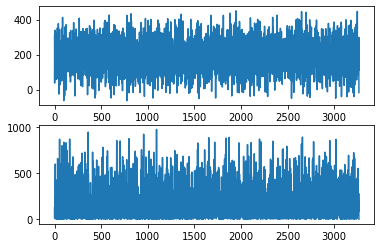

In [81]:
# 可视化： 预测结果pred_y与真实值test_y可视化
fig,ax = plt.subplots(2,1)
ax[0].plot(pred_y)
ax[1].plot(np.array(test_y))

**↑♎分析：**  对于以上两个图,预测结果差距较大。而且预测值有出现小于零的情况，这是不应该的,针对这个情况引入以下指标。

**RMSLE 指标**

>* 由于RMSE对预测多了和预测少了的惩罚相同，而在共享自行车需求的预测中，公司投放车辆时，宁可多投放一些，也不愿意看到消费者无车可骑的情况，所以，欠预测比过预测的损失会更大，预测值应该是不少于真实值，故惩罚欠预测大于过预测。

> * Root Mean Squared Logarithmic Error (RMSLE)的公式如下：

$$\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$
>>其中:   
$n$ 是测试集中的样本数 <br>
$p_i$ 是预测的自行车租用数量<br>
$a_i$ 是实际的自行车租用数量<br>
$\log(x)$ 是自然对数<br>

>* RMSLE与RMSE一样越小越好，区别在于RMSLE关注的是比例而不是绝对值，惩罚欠预测大于过预测。
>>$\log(p_i + 1) - \log(a_i+1)=\displaystyle\log{\frac{p_i+1}{a_i+1}}$

>* `numpy`中有个函数`np.log1p(x)`就是 `log(x+1)`


> ![Fig02_01](./imgs/Fig02_01_logx.png)

In [82]:
#遍历表达式
#把range（10）里的值一个一个拿出来赋值给变量i
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [83]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
#计算RMSLE
def rmsle(y, y_):
    '''
    y:true values
    y_:predict values
    '''
    log1 = np.array([np.log1p(v) for v in y_])
    log2 = np.array([np.log1p(v) for v in y])
    calc = (log1 - log2) **2
    #np.mean()求平均值
    res = np.sqrt(np.mean(calc))
    return res

In [85]:
# s1:用log1p构建新模型，log1p就是 log(x+1)，可以避免出现负数结果
lr_log1p = LinearRegression()
# s2:训练
lr_log1p.fit(X=train_x,y=np.log1p(train_y))
# s3：预测
preds_log1p = lr_log1p.predict(X=test_x)
# 注意preds_log1p是log1p值，可用np.expm1()还原

In [86]:
pred_y = np.expm1(preds_log1p)

In [87]:
# 回归效果分析,注
msle = rmsle(test_y,pred_y)
print("LinearRegression'RMSLE:",msle)

LinearRegression'RMSLE: 1.2149413365859931


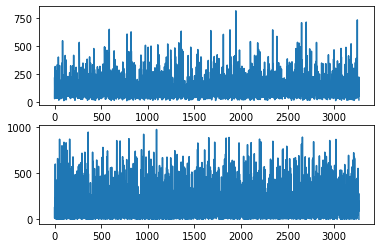

In [88]:
# 预测结果与真实值可视化
fig,ax = plt.subplots(2,1)
ax[0].plot(np.expm1(preds_log1p))
ax[1].plot(np.array(test_y))

**小结：** 可以看出，没有小于零的情况了。

## 4. 特征工程
    - 特征编码
    - 构造新特征

> + 源数据中的特征：`season`，`holiday`，`workingday`和`weather`列应该是`categorical`分类数据类型。但是这些列的当前数据类型是`int`。 需要转换数据集，以便可以做后续的分析。

>  - 从`datetime`列创建新列`date`，`hour`，`year`，`month`,`weekDay`。
 
>  - 将`datetime`列添加到待删除的列中，因为我们已经从中提取了有用的功能。
  
>  - 强制转换`season`，`holiday`，`workingday`和`weather`到`category`类别的数据类型。


### 4.1 时间日期特征处理
> + 对`datetime`列提取新特征，创建新列

In [89]:
# 查看源数据dataDaily.head()
dataDaily.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011/1/1 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011/1/1 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011/1/1 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011/1/1 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011/1/1 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [90]:
# 查看特征'datetime'的前5行
dataDaily['datetime'][:5]

0    2011/1/1 0:00
1    2011/1/1 1:00
2    2011/1/1 2:00
3    2011/1/1 3:00
4    2011/1/1 4:00
Name: datetime, dtype: object

**↑♎分析：** `dtype:object`说明该特征数据为文本型，而不是日期型`datetime`，需要进行分割转换，如下：。

In [91]:
dataDaily['datetime'][0]

'2011/1/1 0:00'

In [92]:
# 以第一个数据为例，分割日期(年月日)文本和时间(时分)文本
x = dataDaily['datetime'][0].split()
x

['2011/1/1', '0:00']

In [93]:
# 再继续分割
x[0].split('/'), x[1].split(':')

(['2011', '1', '1'], ['0', '00'])

In [94]:
# 将(年,月,日)形式的文本转换成datetime类型，格式为%Y/%m/%d
from datetime import datetime
d1 = datetime.strptime(x[0],"%Y/%m/%d")
d1

datetime.datetime(2011, 1, 1, 0, 0)

In [95]:
# 从datetime数据中通过属性访问年、月、日、周几等
d1.year, d1.month, d1.day,d1.weekday()

(2011, 1, 1, 5)

**↑♎分析：** 通过以上过程知道了日期转换过程，下面进行批量转换

In [96]:
#apply(lambda x)
#对数据中的每一行（x）都进行同样的的操作
dataDaily['date'] = dataDaily["datetime"].apply(lambda x:x.split()[0])

In [97]:
dataDaily['date']

0          2011/1/1
1          2011/1/1
2          2011/1/1
3          2011/1/1
4          2011/1/1
            ...    
10881    2012/12/19
10882    2012/12/19
10883    2012/12/19
10884    2012/12/19
10885    2012/12/19
Name: date, Length: 10886, dtype: object

In [98]:
from datetime import datetime
dataDaily['date'] = dataDaily["datetime"].apply(lambda x:x.split()[0])
dataDaily['hour'] = dataDaily["datetime"].apply(lambda x:x.split()[1].split(':')[0]).astype('int')

dataDaily['year'] = dataDaily["date"].apply(lambda x:datetime.strptime(x,'%Y/%m/%d').year)
dataDaily['month'] = dataDaily["date"].apply(lambda x:datetime.strptime(x,'%Y/%m/%d').month)
dataDaily['weekday'] = dataDaily["date"].apply(lambda x:datetime.strptime(x,'%Y/%m/%d').weekday())

# 查看日期转换后的新特征结果                                          
dataDaily[["datetime",'date','hour','year','month','weekday']].head()

,datetime,date,hour,year,month,weekday
0,2011/1/1 0:00,2011/1/1,0,2011,1,5
1,2011/1/1 1:00,2011/1/1,1,2011,1,5
2,2011/1/1 2:00,2011/1/1,2,2011,1,5
3,2011/1/1 3:00,2011/1/1,3,2011,1,5
4,2011/1/1 4:00,2011/1/1,4,2011,1,5


### 4.2 类别特征数据转换
> 分类类型转换成category

In [99]:
# 查看所有特征名称
dataDaily.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour', 'year', 'month', 'weekday'],
      dtype='object')

In [100]:
type(dataDaily['season'][0])

numpy.int64

**↑♎分析:** 根据业务情况，`'season','holiday','workingday','weekday','month','year'`都是类别型

In [101]:
# 将以上特征转成''类型
categoricalFeature_s = ['season','holiday','workingday','weekday','month','year']
for var in categoricalFeature_s:
    dataDaily[var] = dataDaily[var].astype('category')

In [102]:
# 展示编码后的新数据列
dataDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime      10886 non-null object
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null object
hour          10886 non-null int32
year          10886 non-null category
month         10886 non-null category
weekday       10886 non-null category
dtypes: category(6), float64(3), int32(1), int64(5), object(2)
memory usage: 958.1+ KB


### 4.3  离散变量编码---One-Hot
> + 对离散型变量`season`,`weather` 进行One-Hot编码,并替换掉原来的列。
> + `season`季节 1：春天， 2：夏天， 3：秋天， 4：冬天
> + `weather`天气情况: 
>> + 1：无云，少量云，部分多云 
>> + 2：雾+多云，雾+云散开，雾+少云，雾 
>> + 3：小雪，小雨+雷暴+散云，小雨+散云 
>> + 4：暴雨+冰雹+雷暴+雾，雪+雾

In [103]:
# 先保留一个备份['season','weather']
dataDaily[['season_org','weather_org']] = dataDaily[['season','weather']]
# 哑变量转换，pd.get_dummies()
dataDaily = pd.get_dummies(data = dataDaily,columns = ['season','weather'],drop_first=True)
# 查看结果
dataDaily.sample(5)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,month,weekday,season_org,weather_org,season_2,season_3,season_4,weather_2,weather_3,weather_4
10185,2012/11/9 19:00,0,1,13.94,17.425,71,6.0032,30,331,361,...,11,4,4,1,0,0,1,0,0,0
666,2011/2/11 0:00,0,1,4.10,6.820,49,7.0015,2,12,14,...,2,4,1,1,0,0,0,0,0,0
1795,2011/5/1 17:00,0,0,19.68,23.485,82,16.9979,60,136,196,...,5,6,2,2,1,0,0,1,0,0
1157,2011/3/12 21:00,0,0,15.58,19.695,62,0.0000,36,46,82,...,3,5,1,1,0,0,0,0,0,0
6629,2012/3/13 12:00,0,1,24.60,30.305,60,19.0012,47,197,244,...,3,1,1,1,0,0,0,0,0,0


In [104]:
#展示编码后的新数据列
dataDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
datetime       10886 non-null object
holiday        10886 non-null category
workingday     10886 non-null category
temp           10886 non-null float64
atemp          10886 non-null float64
humidity       10886 non-null int64
windspeed      10886 non-null float64
casual         10886 non-null int64
registered     10886 non-null int64
count          10886 non-null int64
date           10886 non-null object
hour           10886 non-null int32
year           10886 non-null category
month          10886 non-null category
weekday        10886 non-null category
season_org     10886 non-null category
weather_org    10886 non-null int64
season_2       10886 non-null uint8
season_3       10886 non-null uint8
season_4       10886 non-null uint8
weather_2      10886 non-null uint8
weather_3      10886 non-null uint8
weather_4      10886 non-null uint8
dtypes: category(6), float64(3), int3

### 4.4 数值型特征与目标的回归分析   
> - 考察上面的数值型特征：`temp`，`humidity`，`windspeed`, `hour`；    
- 使用`sn.jointplot()`绘制`count` vs `temp`，`humidity`，`windspeed`, `hour` 的回归图`(kind='reg')`。

In [105]:
# sn.jointplot?

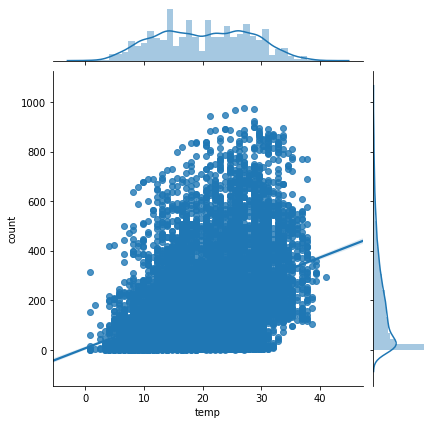

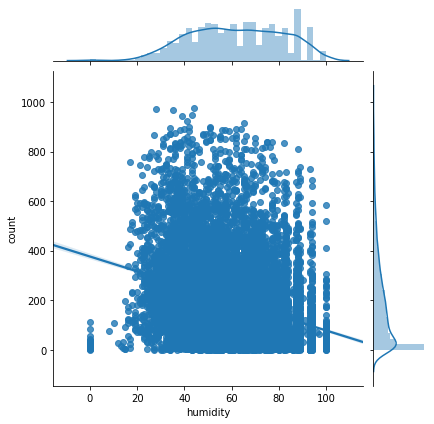

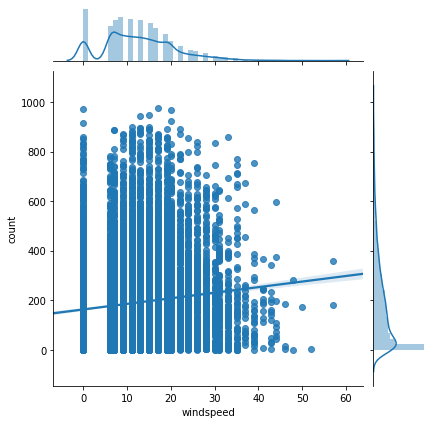

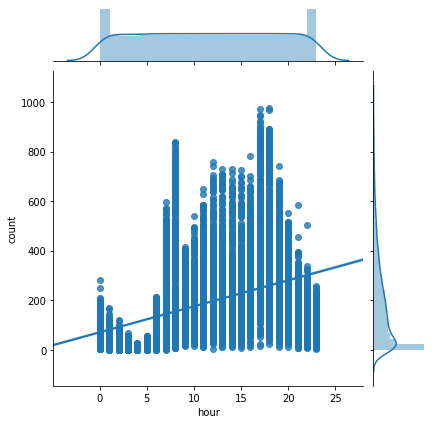

In [106]:
# 绘制回归图
sn.jointplot(x="temp", y="count", data=dataDaily, kind="reg")
sn.jointplot(x="humidity", y="count", data=dataDaily, kind="reg")
sn.jointplot(x="windspeed", y="count", data=dataDaily, kind="reg")
sn.jointplot(x="hour", y="count", data=dataDaily, kind="reg")

**↑♎分析：** 从图可看出，`temp`，`humidity`，`windspeed`, `hour`与`count`之间都是非线性的关系<br>

### 4.5  构造新特征
> **采用`log1p()`方式构造新特征**
>> + 使用log1p()函数对偏度比较大的数据用进行预处理，使其更加服从高斯分布，可使后续的分类/回归结果得到优化。
>> + 将特征`temp，humidity，windspeed, hour`构造成`log_temp,log_windspeed,log_humidity,log_hour`。

In [107]:
# 构造新特征
dataDaily["log_temp"] = np.log1p(dataDaily['temp'])
dataDaily["log_windspeed"] = np.log1p(dataDaily['windspeed'])
dataDaily["log_humidity"] = np.log1p(dataDaily['humidity'])
dataDaily["log_hour"] = np.log1p(dataDaily['hour'])

In [108]:
#展示编码后的新数据info()
dataDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 27 columns):
datetime         10886 non-null object
holiday          10886 non-null category
workingday       10886 non-null category
temp             10886 non-null float64
atemp            10886 non-null float64
humidity         10886 non-null int64
windspeed        10886 non-null float64
casual           10886 non-null int64
registered       10886 non-null int64
count            10886 non-null int64
date             10886 non-null object
hour             10886 non-null int32
year             10886 non-null category
month            10886 non-null category
weekday          10886 non-null category
season_org       10886 non-null category
weather_org      10886 non-null int64
season_2         10886 non-null uint8
season_3         10886 non-null uint8
season_4         10886 non-null uint8
weather_2        10886 non-null uint8
weather_3        10886 non-null uint8
weather_4        10886 non-nu

## 5. 异常值检测和处理

### 5.1  探测异常值
> - 使用`sn.boxplot()`可视化 `count`     
- 可视化变量`season_org`,`hour`,`workingday`与`count`之间的关系   
- 将以上4个图画在一个fig上，2行2列

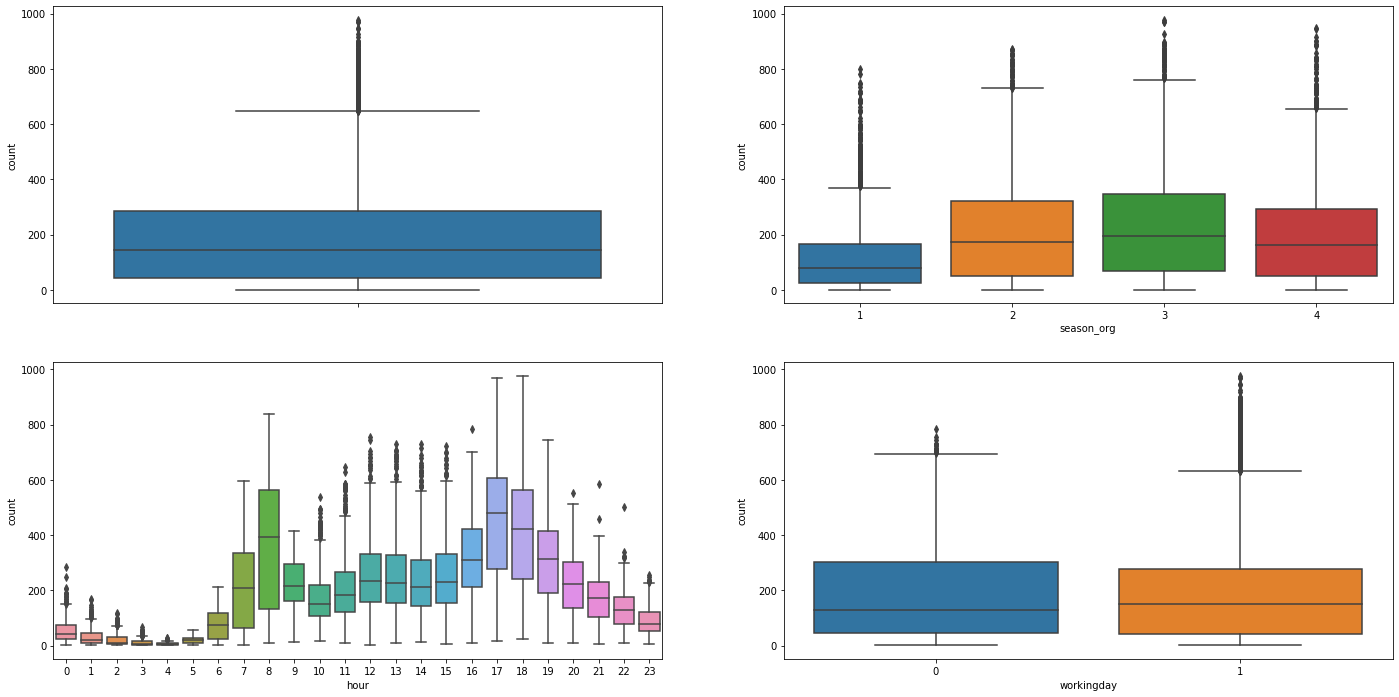

In [109]:
# 绘制箱线图查看异常值
fig, axes = plt.subplots(2,2)
fig.set_size_inches(24,12)
sn.boxplot(data=dataDaily, y='count',ax=axes[0][0])
sn.boxplot(data=dataDaily, y='count',x='season_org',ax=axes[0][1])
sn.boxplot(data=dataDaily, y='count',x='hour',ax=axes[1][0])
sn.boxplot(data=dataDaily, y='count',x='workingday',ax=axes[1][1])

**↑♎分析：**  从给出的箱图做出以下推断：
- 图1：`count`变量包含许多异常值数据点，这些数据点的分布右偏（因为超出外部四分位数限制的数据点更多）。
- 图2：`season` VS `count`,春季用车数量相对较少，这点从箱形图中位数较低可以看出来。
- 图3：`Hour Of The Day`的箱线图很有意思。中位数的值在早上7点-早上8点和下午5点 - 下午6点相对较高。它可以归因于这些时间段的上学的人和上班族。
- 图4：`workingday` VS `count`,可以看出，工作日与非工作日的`count`差不多，但大多数离群值主要来自`Working Day`工作日而不是`Non Working Day`非工作日。

### 5.2  删除目标列`count`中的异常值
> - 保留`count`中与平均值的偏差绝对值在3倍标准差以内的样本；
> - 注意：删除训练集中的异常，测试集中的数据不能动；  
> - 所以先对数据集进行重整理，drop掉无关特征，然后train-test集合划分   

In [110]:
# 查看所有的特征名
dataDaily.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'date', 'hour', 'year',
       'month', 'weekday', 'season_org', 'weather_org', 'season_2', 'season_3',
       'season_4', 'weather_2', 'weather_3', 'weather_4', 'log_temp',
       'log_windspeed', 'log_humidity', 'log_hour'],
      dtype='object')

In [111]:
# 去掉无关特征-drop(axis=1)
# 'datetime','atemp', 'casual', 'registered','date','season_org', 'weather_org','count'
dropFeatures = ['datetime','atemp', 'casual', 'registered','date','season_org', 'weather_org','count']
# 去掉无关特征得到X
X = dataDaily.drop(dropFeatures,axis=1)
# 获取y_labels
y_labels = dataDaily['count']

In [112]:
# train-test划分,注意：固定random_state,test_size=0.3
train_x,test_x,train_y,test_y = train_test_split(X,y_labels,test_size=0.3,random_state=42)

In [113]:
# 重组训练数据集data_train
data_train = pd.concat([train_x,train_y],axis=1)
data_train.head()

,holiday,workingday,temp,humidity,windspeed,hour,year,month,weekday,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
613,0,1,9.02,32,39.0007,17,2011,2,1,0,0,0,0,0,0,2.304583,3.688897,3.496508,2.890372,176
4030,0,0,22.14,68,12.9980,23,2011,9,6,0,1,0,0,0,0,3.141563,2.638914,4.234107,3.178054,54
3582,0,1,26.24,83,0.0000,4,2011,8,4,0,1,0,0,0,0,3.304686,0.000000,4.430817,1.609438,8
10101,0,1,9.02,69,8.9981,6,2012,11,1,0,0,1,0,0,0,2.304583,2.302395,4.248495,1.945910,149
1430,0,1,13.12,81,30.0026,11,2011,4,1,1,0,0,0,1,0,2.647592,3.434071,4.406719,2.484907,19


✎ **剔除训练数据`data_train`中的异常值**
> + 标准是：保留`count`中与平均值(mean)的偏差绝对值(np.abs())在3倍标准差(std)以内的样本

In [114]:
# 查看data_train的原始大小
print(data_train.shape)
# 求train_y的平均值mean
mean = train_y.mean()
# 求train_y的标准差(std)
std = train_y.std()
# 根据标准过滤
data = data_train[np.abs(train_y-mean)<=3*std]
print(data.shape)

(7620, 20)
(7514, 20)


**↑♎分析：**  训练集`data_train`中剔除了106个异常样本。

## 6. 数值特征标准化
> + 需要标准化的特征 `temp`,`humidity`,`windspeed`,`hour`

In [115]:
# 标准化之前对data进行描述性统计
data.describe()

,temp,humidity,windspeed,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
count,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000
mean,20.150240,62.050306,12.805329,11.430796,0.249667,0.247671,0.253127,0.261778,0.077455,0.000133,2.970449,2.326346,4.087239,2.272517,182.584509
std,7.809803,19.212934,8.215052,6.955263,0.432849,0.431688,0.434832,0.439632,0.267330,0.011536,0.427549,0.957728,0.372585,0.820437,166.758627
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598837,0.000000,0.000000,0.000000,1.000000
25%,13.940000,47.000000,7.001500,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.704042,2.079629,3.871201,1.791759,40.000000
50%,20.500000,62.000000,12.998000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.068053,2.638914,4.143135,2.484907,140.000000
75%,26.240000,78.000000,16.997900,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.304686,2.890255,4.369448,2.890372,277.000000
max,41.000000,100.000000,56.996900,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.737670,4.060390,4.615121,3.178054,734.000000


### 6.1 min-max标准化
> - 对`temp`,`humidity`,`windspeed`,`hour`做最大值最小值标准化,
- $x_{scaled} = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)}$     
- 转换之后数据分布在[0,1]区间

In [116]:
# 需要标准化的features
numerialFeatures = ['temp','humidity','windspeed','hour']
# min-max 标准化 SO:导入MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# min-max 标准化 S1: 实例化模型
scaler_mm = MinMaxScaler()
# min-max 标准化 S2: 训练模型
scaler_mm.fit(data[numerialFeatures])
# min-max 标准化 S3: 使用模型transform
data[numerialFeatures] = scaler_mm.transform(data[numerialFeatures])

In [117]:
# 标准化之后数值型特征的描述性统计量
data.describe()

,temp,humidity,windspeed,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
count,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000,7514.000000
mean,0.481091,0.620503,0.224667,0.496991,0.249667,0.247671,0.253127,0.261778,0.077455,0.000133,2.970449,2.326346,4.087239,2.272517,182.584509
std,0.194370,0.192129,0.144132,0.302403,0.432849,0.431688,0.434832,0.439632,0.267330,0.011536,0.427549,0.957728,0.372585,0.820437,166.758627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598837,0.000000,0.000000,0.000000,1.000000
25%,0.326531,0.470000,0.122840,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.704042,2.079629,3.871201,1.791759,40.000000
50%,0.489796,0.620000,0.228047,0.478261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.068053,2.638914,4.143135,2.484907,140.000000
75%,0.632653,0.780000,0.298225,0.739130,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.304686,2.890255,4.369448,2.890372,277.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.737670,4.060390,4.615121,3.178054,734.000000


**↑♎分析：** 可以看出，标准化成功。接下来，我们重新构建模型，看看经过数据预处理后模型预测的效果。

## 7. 重新建模(使用预处理&标准化后的数据)

### 7.1 构建验证数据集并标准化

In [118]:
#构造验证集
data_test = pd.concat([test_x,test_y],axis=1)

# 用训练集已经拟合好的scaler对验证集做标准化
data_test[numerialFeatures] =scaler_mm.transform(data_test[numerialFeatures])

### 7.2  标准化后的train-test构建

In [119]:
# 构建train_x，train_y
train_x = data.copy().drop(['count'],axis=1)
train_y = data['count']

# 构建test_x，test_y
test_x = data_test.drop(['count'],axis=1)
test_y = data_test['count']

### 7.3 重新建模&训练&预测`count`

In [127]:
#S1:实例化新的线性回归模型
lr_new = LinearRegression()

#S2: 训练模型，y=np.log1p(train_y)
lr_new.fit(X=train_x,y=np.log1p(train_y))

#S3: 使用模型预测           
pred_logy = lr_new.predict(X=test_x) 

## np.expml()反转化np.loglp()
pred_y= np.expm1(pred_logy)

#S4: 评估---回归效果RMSLE评估
msle = rmsle(test_y,pred_y)

print("标准化处理后的模型RMSLE:",msle)

标准化处理后的模型RMSLE: 0.9734117319260284


**↑♎分析：** 标准化后标准差由原来3.3节中的`LinearRegression'RMSLE: 1.2149413365859931` ，下降到了`0.9732`，说明预处理和标准化还是有效果的。

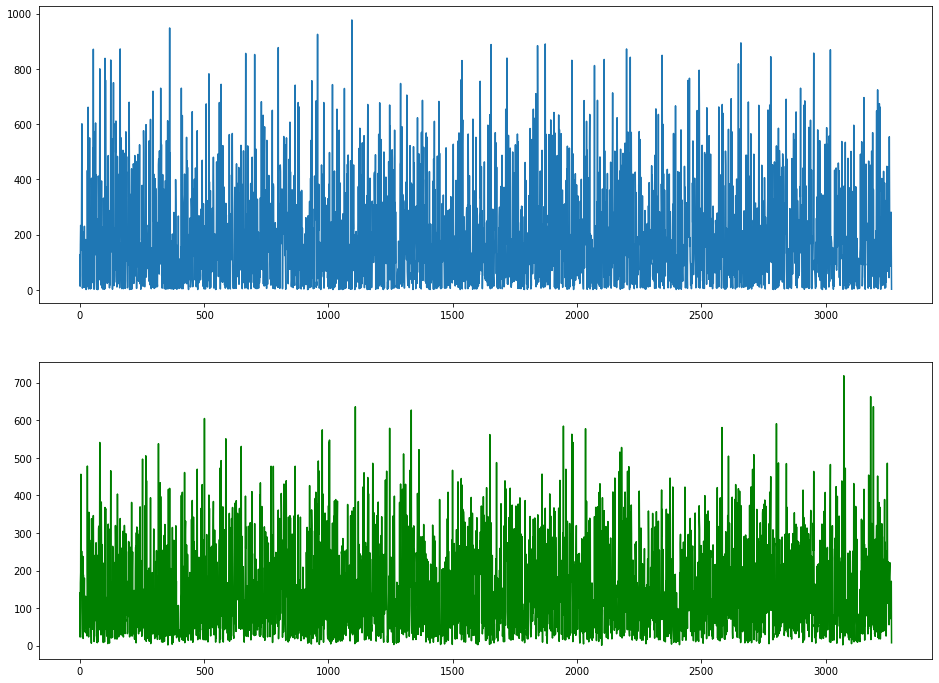

In [128]:
# 预测结果与真实值可视化
fig,ax = plt.subplots(2,1)
fig.set_size_inches(16,12)
ax[0].plot(np.array(test_y))
ax[1].plot(pred_y,color='green')

**分析：** 从图上也可以看出，效果好多了！

## 小结
> - 数据探索   
- 特征相关性分析 
- 直接建模：rawData-->model   
- 特征工程  
- 异常值检测与处理
- 数值标准化  
- 重新建模：newData-->model 